# Homework 2 (Sun Yi)

### 0. Import libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

%matplotlib inline

### 1. Get the time series for the following cryptocurrencies from cryptowat.ch starting from 2021-11-22, hourly data
1. ETH
2. SOL
3. AVAX
4. USDT
5. FLOW

In [68]:
def get_data(token, exchange):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [69]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT']
dfs = [get_data(token, 'coinbase-pro') for token in tokens]

#pull FLOW data separately from Kraken
df_FLOW = get_data('FLOW', 'kraken')

dfs.append(df_FLOW)

In [70]:
df = pd.concat(dfs, ignore_index=True)
df.head()

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH


### 2. Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [71]:
df_volumes = df.groupby('token')['volumeUSD'].sum().sort_values(ascending=False).to_frame()
df_volumes

,volumeUSD
token,
ETH,2.519797e+10
SOL,8.241910e+09
AVAX,4.485609e+09
USDT,2.280028e+09
FLOW,9.705744e+07


### 3. Add a column that calculates the close price ratio between ETH and SOL for each hour

In [72]:
df_ETH_close = df[df['token'] == 'ETH'].set_index('ts')['close'].sort_index()
df_SOL_close = df[df['token'] == 'SOL'].set_index('ts')['close'].sort_index()
df_ETHSOL = df_ETH_close / df_SOL_close
df_ETHSOL = df_ETHSOL.to_frame().rename(columns = {'close' : 'ETH/SOL close'})
df = pd.merge(df, df_ETHSOL, on = 'ts', how = 'inner')
df

,ts,open,high,low,close,volume,volumeUSD,token,ETH/SOL close
0,2021-11-22 00:00:00,4317.9800,4342.2400,4246.0700,4262.9900,7.262563e+03,3.123077e+07,ETH,18.471694
1,2021-11-22 00:00:00,230.4830,234.6880,228.8050,230.7850,9.353180e+04,2.172284e+07,SOL,18.471694
2,2021-11-22 00:00:00,131.6900,133.7900,127.7000,128.6700,9.686748e+04,1.267080e+07,AVAX,18.471694
3,2021-11-22 00:00:00,1.0010,1.0017,1.0009,1.0012,9.987681e+06,9.999090e+06,USDT,18.471694
4,2021-11-22 00:00:00,13.8870,14.1690,13.8870,14.1500,2.326138e+04,3.274755e+05,FLOW,18.471694
...,...,...,...,...,...,...,...,...,...
3375,2021-12-20 03:00:00,3933.8500,3942.4900,3914.8500,3923.5300,2.602969e+03,1.022305e+07,ETH,21.894699
3376,2021-12-20 03:00:00,179.0300,180.0000,178.6500,179.2000,2.631667e+04,4.718080e+06,SOL,21.894699
3377,2021-12-20 03:00:00,108.4600,108.4700,106.0000,106.0300,4.258263e+04,4.556830e+06,AVAX,21.894699
3378,2021-12-20 03:00:00,1.0003,1.0004,1.0002,1.0003,1.376714e+06,1.377169e+06,USDT,21.894699


### 4. Change the name of the volume and volumeUSD columns to volumeBase and volumeTerm 

In [73]:
df.rename(columns = {'volume': 'volumeBase', 'volumeUSD': 'volumeTerm'}, inplace = True)
df

,ts,open,high,low,close,volumeBase,volumeTerm,token,ETH/SOL close
0,2021-11-22 00:00:00,4317.9800,4342.2400,4246.0700,4262.9900,7.262563e+03,3.123077e+07,ETH,18.471694
1,2021-11-22 00:00:00,230.4830,234.6880,228.8050,230.7850,9.353180e+04,2.172284e+07,SOL,18.471694
2,2021-11-22 00:00:00,131.6900,133.7900,127.7000,128.6700,9.686748e+04,1.267080e+07,AVAX,18.471694
3,2021-11-22 00:00:00,1.0010,1.0017,1.0009,1.0012,9.987681e+06,9.999090e+06,USDT,18.471694
4,2021-11-22 00:00:00,13.8870,14.1690,13.8870,14.1500,2.326138e+04,3.274755e+05,FLOW,18.471694
...,...,...,...,...,...,...,...,...,...
3375,2021-12-20 03:00:00,3933.8500,3942.4900,3914.8500,3923.5300,2.602969e+03,1.022305e+07,ETH,21.894699
3376,2021-12-20 03:00:00,179.0300,180.0000,178.6500,179.2000,2.631667e+04,4.718080e+06,SOL,21.894699
3377,2021-12-20 03:00:00,108.4600,108.4700,106.0000,106.0300,4.258263e+04,4.556830e+06,AVAX,21.894699
3378,2021-12-20 03:00:00,1.0003,1.0004,1.0002,1.0003,1.376714e+06,1.377169e+06,USDT,21.894699


### 5. Create a fat table indexed by the timestamp, and each column is the close price of each token

In [74]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']
dfs_close = [df[df['token'] == token].set_index('ts')['close'].to_frame().rename(columns={'close':token}) for token in tokens]
df_close = dfs_close[0].join(dfs_close[1:])
df_close

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-12-19 23:00:00,3982.18,183.210,109.81,1.0005,8.409
2021-12-20 00:00:00,3925.79,179.950,107.60,1.0003,8.348
2021-12-20 01:00:00,3947.97,180.410,107.78,1.0003,8.315


#### 5.1 Create fat table using a different method (pivot_table)

In [77]:
df_close2 = pd.pivot_table(df, values='close', index='ts', columns='token', aggfunc=np.sum).sort_index()
df_close2

token,AVAX,ETH,FLOW,SOL,USDT
ts,,,,,
2021-11-22 00:00:00,128.67,4262.99,14.150,230.785,1.0012
2021-11-22 01:00:00,134.85,4234.37,13.621,226.000,1.0013
2021-11-22 02:00:00,132.54,4217.89,13.753,227.037,1.0012
2021-11-22 03:00:00,133.38,4193.47,13.652,223.117,1.0011
2021-11-22 04:00:00,136.29,4168.35,13.581,220.652,1.0009
...,...,...,...,...,...
2021-12-19 23:00:00,109.81,3982.18,8.409,183.210,1.0005
2021-12-20 00:00:00,107.60,3925.79,8.348,179.950,1.0003
2021-12-20 01:00:00,107.78,3947.97,8.315,180.410,1.0003


### 6. Calculate the hour by hour log return of the close price of each token

In [87]:
df_close_shifted = df_close.shift()
df_logreturn = np.log(df_close / df_close_shifted).dropna()
df_logreturn

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
2021-11-22 05:00:00,-0.002472,-0.015161,-0.031832,-0.0001,-0.014014
...,...,...,...,...,...
2021-12-19 23:00:00,0.015128,0.018454,0.008322,0.0001,0.005605
2021-12-20 00:00:00,-0.014262,-0.017954,-0.020331,-0.0002,-0.007281
2021-12-20 01:00:00,0.005634,0.002553,0.001671,0.0000,-0.003961


### 7. [Stretch] calculate the correlation of the tokens using the table above

In [90]:
df_logreturn_corr = df_logreturn.corr()
df_logreturn_corr

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.758845,0.654226,-0.088501,0.582609
SOL,0.758845,1.000000,0.645484,0.106361,0.477019
AVAX,0.654226,0.645484,1.000000,0.014412,0.404085
USDT,-0.088501,0.106361,0.014412,1.000000,-0.175448
FLOW,0.582609,0.477019,0.404085,-0.175448,1.000000


### 8. [Stretch] visualize the correlation in a matplpotlib plot

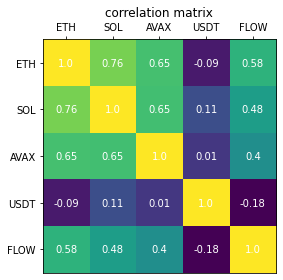

In [109]:
# below implementations referenced from matplolib library documentation:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html?highlight=correlation%20matrix

fig, ax = plt.subplots()
im = ax.imshow(df_logreturn_corr)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(df_logreturn_corr.columns)), labels=df_logreturn_corr.columns)
ax.set_yticks(np.arange(len(df_logreturn_corr.index)), labels=df_logreturn_corr.index)
ax.xaxis.tick_top()

# Loop over data dimensions and create text annotations.
for i in range(len(df_logreturn_corr.index)):
    for j in range(len(df_logreturn_corr.columns)):
        text = ax.text(i, j, round(df_logreturn_corr.iloc[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_title("correlation matrix")
fig.tight_layout()
plt.show()
